<a href="https://colab.research.google.com/github/rajput-t/deep_learning/blob/main/Convolutional_Neural_Network_(Using_TensorFlow).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Digit Classifier - MNIST Dataset

We will build and train a Convolutional Neural Network (CNN) using TensorFlow/Keras to classify handwritten digits (0–9) from the MNIST dataset.

## Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

## Load and Prepare the MNIST Dataset

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape to add channel dimension (grayscale → 1 channel)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_cat = tf.keras.utils.to_categorical(y_train, 10)
y_test_cat = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Build the CNN Model

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 digit classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

## Train the Model

In [ ]:
history = model.fit(X_train, y_train_cat, epochs=5,
                    validation_data=(X_test, y_test_cat),
                    batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 51s 52ms/step - accuracy: 0.8717 - loss: 0.4254 - val_accuracy: 0.9766 - val_loss: 0.0748
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 47ms/step - accuracy: 0.9820 - loss: 0.0599 - val_accuracy: 0.9870 - val_loss: 0.0390
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 86s 52ms/step - accuracy: 0.9871 - loss: 0.0423 - val_accuracy: 0.9842 - val_loss: 0.0435
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 78s 48ms/step - accuracy: 0.9914 - loss: 0.0288 - val_accuracy: 0.9885 - val_loss: 0.0342
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.9929 - loss: 0.0223 - val_accuracy: 0.9888 - val_loss: 0.0329


## Evaluate and Visualize

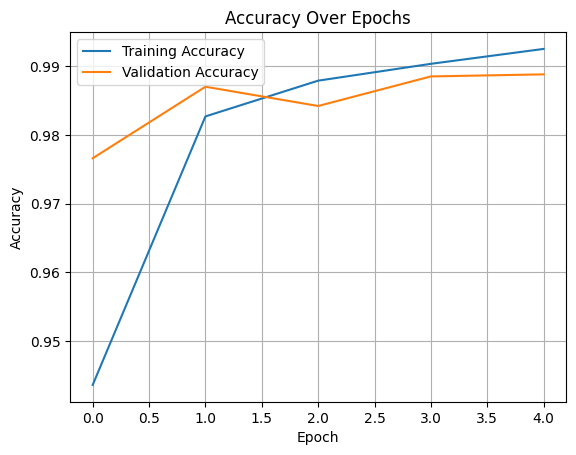

Test Accuracy: 0.9888


In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

# Final Evaluation
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

## Make Predictions

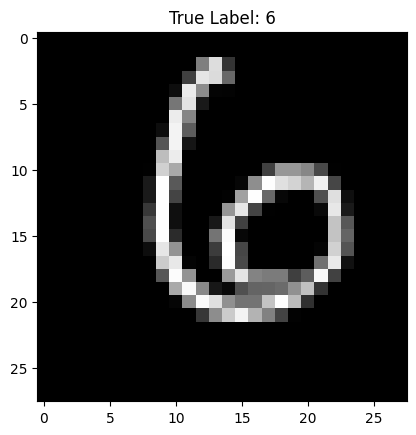

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Predicted Label: 6


In [ ]:
sample_index = 100
sample_image = X_test[sample_index]
sample_label = y_test[sample_index]

plt.imshow(sample_image.squeeze(), cmap='gray')
plt.title(f"True Label: {sample_label}")
plt.show()

prediction = model.predict(sample_image.reshape(1,28,28,1))
predicted_label = np.argmax(prediction)
print(f"Predicted Label: {predicted_label}")